In [1]:
wh <- read.csv('weight-height.csv.gz')
# first i want to put my data into a variable called wh using read.csv

get_20_sample <- wh[sample(nrow(wh),20),]
# here i choose the to randomly sample the rows of the dataset and chose
# 20 random samples, then put that into a new variable called get_20_sample

#which(get_20_sample== 'Male')

In [2]:
# number 1a


i <- 0
# before i start my while loop i want to initialize a variable i to be 0

sample_M <- c()
# i want to create an empty set where i can put the number of males the
# sample gave back 

sample_F <- c()
# here i do the same for how many females were given by the sample of 20

while (i < 10) {
    # first i want the while loop to run 10 times
    # this allows me to get 10 different samples of 20
    
    get_20_sample <- wh[sample(nrow(wh),20),]
    # i then run my code from the cell above where i tested it 
    
    sample_M <- append(sample_M,length(which(get_20_sample== 'Male')))
    # once the random 20 are choosen, i find which ones are male
    # then take the length of it to find how many were male
    # then i append it to my sample_M variable
    
    sample_F <- append(sample_F,length(which(get_20_sample== 'Female')))
    # this line of code does the same thing but for females
    
    i <- i+1
    # and now i incriment i so it runs this loop again with a different 
    # sample of 20 people
}
sample_M
sample_F
# i print both the sets to show how many in the 1st through 10th were
# male on the top, or female on the bottom

sample_MF_df <- data.frame(sample_M,sample_F)
sample_MF_df
# here i wanted to put both samples into a dataframe called sample_MF_df

chisq.test(sample_MF_df)
# now i can run the chi-square test on this dataframe

# with chisq p-values higher than 0.05, most of the time
# i would say that i can accept 
# the null hypothesis. this means that half the population is men
# since my p-value is greater than 0.05 majority of the time.

[1] 13 13  9 12 11 10  8 12 10 10

[1]  7  7 11  8  9 10 12  8 10 10

sample_M,sample_F
13,7
13,7
9,11
12,8
11,9
10,10
8,12
12,8
10,10
10,10



	Pearson's Chi-squared test

data:  sample_MF_df
X-squared = 5.153, df = 9, p-value = 0.8208


In [57]:
# number 1b

i <- 0
# initilizing my i to be 0

n <- c(40,60,80,100)
# making a list of different random samples i would like to use 

sample_M <- c()
sample_F <- c()
# appending them to my empty lists later in the while loop 

for (x in n){
    # the for loop goes through the n list to select the current number
    # i want to use as a sample
    
    while (i < 10) {
    # using the while loop to get 10 different samples 
    # with the same sample number 
    
    get_x_sample <- wh[sample(nrow(wh),x),]
    # running a random sample with the current value the for loop is on
        
    sample_M <- append(sample_M,length(which(get_x_sample== 'Male')))
    sample_F <- append(sample_F,length(which(get_x_sample== 'Female')))
    # appending how many males and females showed up in each sample
    # to their respective empty lists
        
    i <- i+1
    # incrementing the i value by 1 so i can get more data on the same 
    # sample number
    
    }
i <- 0

# makine i 0 after the current sample number changes so i can start at
# 0 for the next number in n
    
sample_MF_df <- data.frame(sample_M,sample_F)
# making a dataframe to be able to run a chisq test easily
#print(sample_MF_df)


      
#print(chisq.test(sample_MF_df)$p.value)

cat('the pvalue for the ',x, ' sample is ', 
    chisq.test(sample_MF_df)$p.value, '\n' )
# running the chisq test to extract the p-value for each sample 
# size before the for loop starts on the next sample size

sample_M <- NULL
sample_F <- NULL
# since i have to reuse the same variable that i append to, i need
# to empty it again so the new values are the only ones that are in 
# the list for each sample size

    
}



the pvalue for the  40  sample is  0.8068547 
the pvalue for the  60  sample is  0.1477597 
the pvalue for the  80  sample is  0.2952171 
the pvalue for the  100  sample is  0.9969644 


In [59]:
# number 1c
# for number 1c its the same code but only slightly changed to get 100
# extra p-values for each sample size so i can average them out 
# to have a more stable representation of what the p-value would 
# actually be

k <- 0
# i introduced a k incriment so i can do a new while loop over my other 
# code 

i <- 0
n <- c(5,40,60,80,100)
sample_M <- c()
sample_F <- c()

chi_pval_40 <- c()
chi_pval_60<- c()
chi_pval_80<- c()
chi_pval_100<- c()
# then i introduced 4 new variables to store all 100 p-values for each 
# sample size

while (k <100){
    # this while loop will run my previous code in its entirety 100 times
    # i commented the next part of this code above in the previous cell
    for (x in n){
    
    while (i < 10) {
    get_x_sample <- wh[sample(nrow(wh),x),]
    
    sample_M <- append(sample_M,length(which(get_x_sample== 'Male')))
    sample_F <- append(sample_F,length(which(get_x_sample== 'Female')))
    
    i <- i+1
    
    }
    i <- 0


    
    sample_MF_df <- data.frame(sample_M,sample_F)
    #print(sample_MF_df)


      
    #print(chisq.test(sample_MF_df))

    sample_M <- NULL
    sample_F <- NULL

    
    # below are 4 if statements that run inside of the for loop.
    # if the conditions in the for loop are met then this code will
    # append the data to its respective empty list
    # so if the for loop is currently on using 40 as the sample size
    # all the p-values generated for the sample size of 40 will 
    # be appended to the variable called chi_pval_40
    if (x == 40){
    chi_pval_40 <- append(chi_pval_40,chisq.test(sample_MF_df)$p.value)
    
    }
    if (x == 60){
    chi_pval_60 <- append(chi_pval_60, chisq.test(sample_MF_df)$p.value)
    }
    if (x== 80){
    chi_pval_80 <- append(chi_pval_80,chisq.test(sample_MF_df)$p.value)
    }
    if (x== 100){
    chi_pval_100 <- append(chi_pval_100,chisq.test(sample_MF_df)$p.value)
    }
    }
    
    k <- k+1
    # then i increment k by +1 until k is 100
    # results in the next cell
}

In [60]:
# number 1c continued
length(chi_pval_40)
# i wanted to confirm that i do infact have 100 p-values in each 
# variable by calling length on them.

mean(chi_pval_40)
mean(chi_pval_60)
mean(chi_pval_80)
mean(chi_pval_100)
# next i wanted to take the mean of all 100 p-values in each list
# to see a more reliable pvalue generated for each sample size using 
# chisq test

# i wanted to get multiple chi square p-vales for each sample size
# so i decided to sample 40 individuals and get the p-value for that
# up to 100 times. then i did the same for sample 60,80,100.
# after putting 100 p-values into a list i took the mean of them,
# to figure out average p-value that returns for each sample size
# i see that the average chisq p-values are all over 0.05
# so i assume this means that i only needed to sample 40 people to get 
# a reliable estimate for the fraction of males/females in the 
# weight-height data
40/10000
# this means i only need .4%  of the total population to produce reliable
# estimates

[1] 100

[1] 0.5307716

[1] 0.5181259

[1] 0.5009828

[1] 0.4763468

[1] 0.004

In [34]:
# number 1d

8000000*.004

# based on the previous part, i realized that i only needed to sample
# .4% of the entire popluation to get a reliable estimate of male
# to female so, this means i would only need to sample 32000 people
# this seems like a reasonable number to achieve

[1] 32000

In [125]:
# number 2a
diffexpr <- read.csv("diffexpr-results_no_p.csv", header = TRUE,
                     row.names = 1)
# here i read the file and included the frist row and column as names

#length(diffexpr[,1])
#length(diffexpr[,1])*.10



aboral_expr  <- diffexpr[,c(1:5)]
# i got the first 5 columns from the file which contains the gene names
# and aboral1- aboral4 expression data

oral_expr <- diffexpr[,-c(2:5)]
# i removed columns 2-5 to keep columns 1 and 6-9 then passed that to
# to a new variable

#aboral_expr
#oral_expr
oral_mean <- c()
aboral_mean <- c()
# i wated to make empty lists for when i get the mean of each
#differentially expressed gene

t_test_pvalues <- c()
# when i conduct a t-test i want to pass the pvalue into this empty list

i  <- 1
# i want my incriment to start at 1. i am comparing this number to the 
# number of rows any data set contains plus 1.

while (i < length(oral_expr[,1])+1){
    # this while loop starts with i = 1, because i want the loop to 
    # run for every row there is. the rows start counting at 1
    # so i cant have 'i' start at 0
    
    oral_mean <- append(oral_mean,sum(oral_expr[i,c(2:5)])/4)
    aboral_mean <- append(aboral_mean,sum(aboral_expr[i,c(2:5)])/4)
    # i got the means for each gene just incase i needed it later
    
    t_test_pvalues <- append(t_test_pvalues,t.test(oral_expr[i,c(2:5)],
                                    aboral_expr[i,c(2:5)])$p.value)
    
    # i needed to find the p-values for each gene using a t-test
    # and appended it to the empty list called 't_test_pvalues'
    
    i <- i+1
    # now i can incriment and do this for the next row
}
#oral_mean
#length(aboral_mean)
#sum(oral_expr[5,c(2:5)])/4
#oral_expr

means <- data.frame(aboral_mean,oral_mean)
#means

In [129]:
sorted_t_test <- sort(t_test_pvalues)
#sorted_t_test

# i wanted to sort the p_values first to see if i would get a different
# result when running fdr. but it seems like i got the same result

In [78]:
?hist

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50

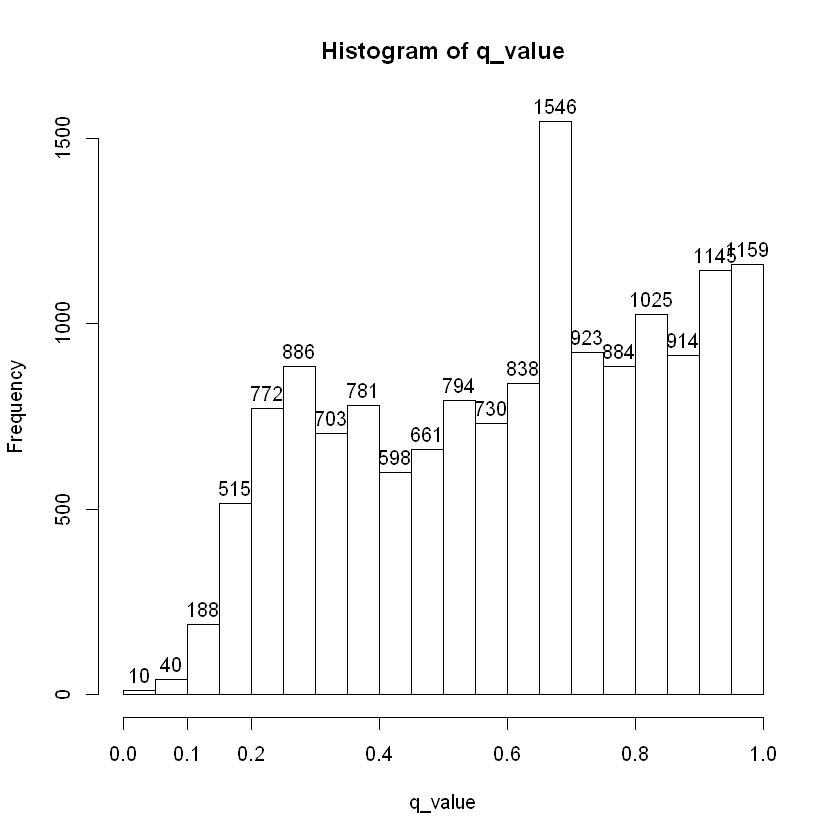

In [90]:
# number 2a
q_value <- round(sort(p.adjust(sorted_t_test, method=c('fdr'))),2)
# here i used the method 'fdr' on the 'sorted_t_test' data, when 
# performing a p.adjust.
# next i sorted the adjusted p-values and rounded them to 2 decimals
# and called that the q_value

fdr_10p <- which(q_value <= 0.10)
# now i am looking to figure out the p-values for the differences
# being significant and choose genes at an FDR or 10%
fdr_10p

hist(q_value, labels = TRUE, xlim = c(0.0,1)) 
axis(side= 1, at= 0.1)
# i only have 50 genes that are below an fdr of 10%

In [45]:
# number 2b
fdr_20p <- which(q_value <= 0.20)
#fdr_20p

length(fdr_20p)- length(fdr_10p)

# i have 703 more genes if i relax FDR to 20%, giving a total of 753

[1] 703

In [95]:
# number 2c

bonf_value <- round(sort(p.adjust(t_test_pvalues,
                                  method=c('bonferroni'))),2)
# here i am using the bonferroni method, on the t_test_pvalues data, and
# using p.adjust. i then sort and round to 2 decimal places

#bonf_value
bon_5p <- which(bonf_value <= 0.05)
length(bon_5p)
# next i get the length of how many values are less than or equal to 
# 0.05. 


# if i use bonferroni correction using the standard 0.05 level of
# significance, there are only 3 genes that survive

[1] 3

In [105]:
#diffexpr
length(means[,1])

[1] 16548

In [123]:
# number 2d
#diffexpr
#means
i <- 1
ratio_mean <- c()
while (i < length(means[,1])+1){
    # this while loop takes the means from aboral and oral of each gene
    # then gets the ratio between the two 
    ratio_mean <- append(ratio_mean,means[i,1]/ means[i,2])
    i <- i+1
}
#means[1,1]

new_ratio <- sort(ratio_mean[-which(ratio_mean == 'Inf')])
# first i needed to remove all the values that were 
# labled 'inf', because that would be included in getting
# the values that are above or equal to 50

new_ratio[which(new_ratio >= 50)]
# here i then was able to properly get the values 
#above or equal to 50

# next i sort the ratios to choose which genes are best fit
# i would have to choose the biggest changing gene
# there are a few ratios that are 52 and above. i would choose those 
# genes


[1]  52.71420  54.01803  54.21309  54.93265  56.51320  59.69918  65.50957
 [8]  65.83195  65.91323  71.79882  72.20175  74.03823  76.94401  88.35520
[15] 104.36107 105.16414 105.88295 107.25532 107.30168 137.08349 160.44564
[22] 180.98308 394.25303